In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
from sklearn.datasets import load_iris, load_breast_cancer
iris_dataset=load_iris()
breast_cancer_dataset=load_breast_cancer()

# **IRIS DATASET**

In [3]:
df_iris=pd.DataFrame(iris_dataset.data,columns=iris_dataset.feature_names)
display(df_iris)
df_iris_target=iris_dataset.target
display(df_iris_target)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
X_train,X_test,Y_train,Y_test=train_test_split(df_iris,df_iris_target,test_size=0.20)

In [5]:
dt_classifier=DecisionTreeClassifier()
dt_classifier.fit(X_train,Y_train)
Y_pred=dt_classifier.predict(X_test)

In [6]:
dt_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(dt_cm)
print("=========================================")
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



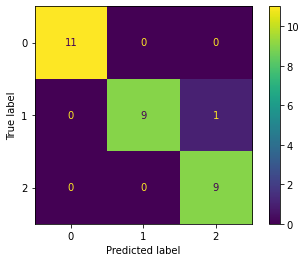

In [7]:
(ConfusionMatrixDisplay(confusion_matrix=dt_cm).plot())

[Text(0.375, 0.9375, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [39, 40, 41]\nclass = virginica'),
 Text(0.25, 0.8125, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(0.5, 0.8125, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 81\nvalue = [0, 40, 41]\nclass = virginica'),
 Text(0.25, 0.6875, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.125, 0.5625, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.375, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.75, 0.6875, 'petal length (cm) <= 5.05\ngini = 0.165\nsamples = 44\nvalue = [0, 4, 40]\nclass = virginica'),
 Text(0.625, 0.5625, 'sepal length (cm) <= 6.5\ngini = 0.463\nsamples = 11\nvalue = [0, 4, 7]\nclass = virginica'),
 Text(0.5, 0.4375, 'sepal width (cm) <= 3.1\ngini = 0.346\nsamples = 9\nvalue = [0, 2, 7]\nclass = virginica'),
 Text(0.375, 0.3125, 'petal width (cm) <

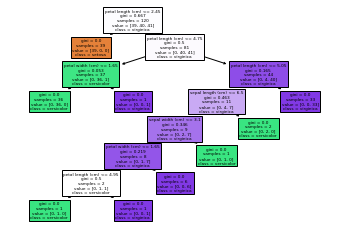

In [8]:
from sklearn.tree import plot_tree
plot_tree(dt_classifier,feature_names=iris_dataset.feature_names,class_names=iris_dataset.target_names,filled=True)

In [9]:
mnb_classifier=MultinomialNB().fit(X_train,Y_train)
mnb_classifier.fit(X_train,Y_train)
Y_pred=mnb_classifier.predict(X_test)

In [10]:
mnb_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(mnb_cm)
print("=========================================")
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Confusion Matrix:
[[11  0  0]
 [ 0  8  2]
 [ 0  0  9]]
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.80      0.89        10
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



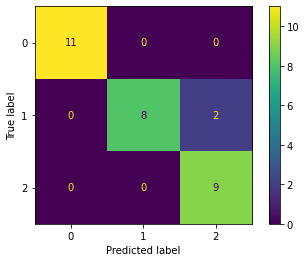

In [11]:
(ConfusionMatrixDisplay(confusion_matrix=mnb_cm).plot())

In [12]:
gnb_classifier=GaussianNB().fit(X_train,Y_train)
gnb_classifier.fit(X_train,Y_train)
Y_pred=gnb_classifier.predict(X_test)

In [13]:
gnb_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(gnb_cm)
print("=========================================")
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



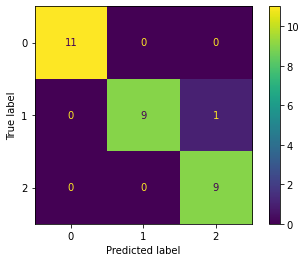

In [14]:
(ConfusionMatrixDisplay(confusion_matrix=gnb_cm).plot())

In [15]:
bnb_classifier=BernoulliNB(alpha=1.1, binarize=1.7).fit(X_train,Y_train)
bnb_classifier.fit(X_train,Y_train)
Y_pred=bnb_classifier.predict(X_test)

In [16]:
bnb_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(bnb_cm)
print("=========================================")
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Confusion Matrix:
[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



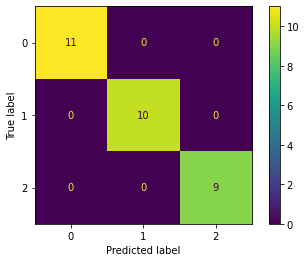

In [17]:
(ConfusionMatrixDisplay(confusion_matrix=bnb_cm).plot())

# **BREAST CANCER DATASET**

In [18]:
df_cancer=pd.DataFrame(breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)
display(df_cancer)
df_cancer_target=breast_cancer_dataset.target
display(df_cancer_target)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(df_cancer,df_cancer_target,test_size=0.20)

In [20]:
dt_classifier=DecisionTreeClassifier()
dt_classifier.fit(X_train,Y_train)
Y_pred=dt_classifier.predict(X_test)

In [21]:
dt_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(dt_cm)
print("=========================================")
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Confusion Matrix:
[[39  4]
 [ 0 71]]
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



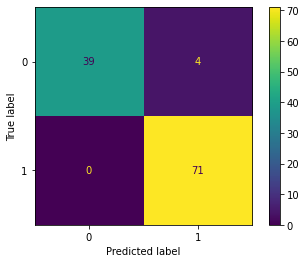

In [22]:
(ConfusionMatrixDisplay(confusion_matrix=dt_cm).plot())

[Text(0.5491071428571429, 0.9285714285714286, 'mean concave points <= 0.052\ngini = 0.467\nsamples = 455\nvalue = [169, 286]\nclass = benign'),
 Text(0.36607142857142855, 0.7857142857142857, 'worst radius <= 16.83\ngini = 0.095\nsamples = 279\nvalue = [14, 265]\nclass = benign'),
 Text(0.26785714285714285, 0.6428571428571429, 'area error <= 48.7\ngini = 0.037\nsamples = 263\nvalue = [5, 258]\nclass = benign'),
 Text(0.17857142857142858, 0.5, 'mean concave points <= 0.049\ngini = 0.023\nsamples = 260\nvalue = [3, 257]\nclass = benign'),
 Text(0.10714285714285714, 0.35714285714285715, 'smoothness error <= 0.003\ngini = 0.008\nsamples = 255\nvalue = [1, 254]\nclass = benign'),
 Text(0.07142857142857142, 0.21428571428571427, 'fractal dimension error <= 0.001\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = benign'),
 Text(0.03571428571428571, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = malignant'),
 Text(0.10714285714285714, 0.07142857142857142, 'gini = 0.0\ns

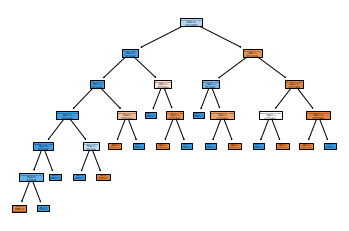

In [23]:
plot_tree(dt_classifier,feature_names=breast_cancer_dataset.feature_names,class_names=breast_cancer_dataset.target_names,filled=True)

In [24]:
mnb_classifier=MultinomialNB(alpha=1.1).fit(X_train,Y_train)
mnb_classifier.fit(X_train,Y_train)
Y_pred=mnb_classifier.predict(X_test)

In [25]:
mnb_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(mnb_cm)
print("=========================================")
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Confusion Matrix:
[[31 12]
 [ 0 71]]
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        43
           1       0.86      1.00      0.92        71

    accuracy                           0.89       114
   macro avg       0.93      0.86      0.88       114
weighted avg       0.91      0.89      0.89       114



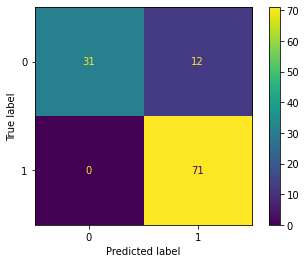

In [26]:
(ConfusionMatrixDisplay(confusion_matrix=mnb_cm).plot())

In [27]:
gnb_classifier=GaussianNB().fit(X_train,Y_train)
gnb_classifier.fit(X_train,Y_train)
Y_pred=gnb_classifier.predict(X_test)

In [28]:
gnb_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(gnb_cm)
print("=========================================")
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Confusion Matrix:
[[37  6]
 [ 1 70]]
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.92      0.99      0.95        71

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



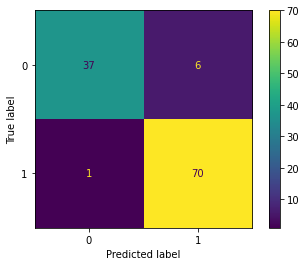

In [29]:
(ConfusionMatrixDisplay(confusion_matrix=gnb_cm).plot())

In [30]:
bnb_cm=BernoulliNB(alpha=1.1, binarize=2.9).fit(X_train,Y_train)
bnb_cm.fit(X_train,Y_train)
Y_pred=bnb_cm.predict(X_test)

In [31]:
bnb_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(bnb_cm)
print("=========================================")
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Confusion Matrix:
[[27 16]
 [ 4 67]]
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.87      0.63      0.73        43
           1       0.81      0.94      0.87        71

    accuracy                           0.82       114
   macro avg       0.84      0.79      0.80       114
weighted avg       0.83      0.82      0.82       114



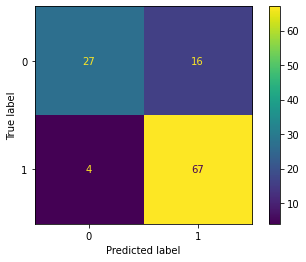

In [32]:
(ConfusionMatrixDisplay(confusion_matrix=bnb_cm).plot())

# **DIABETES DATASET**

In [33]:
# Load the Iris Dataset
diabetes_data = pd.read_csv('./diabetes.csv')
display(diabetes_data)

# Separate features (X) and labels (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
# Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Multinomial Naive Bayes Classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

# Bernoulli Naive Bayes Classifier
bnb = BernoulliNB(alpha=1.1,binarize=1.1,fit_prior=True,class_prior=None)
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

# Evaluate Gaussian Naive Bayes
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes")
print("=========================================")
print(f'Accuracy: {accuracy_gnb:.2f}')
print(classification_report(y_test, y_pred_gnb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))

# Evaluate Multinomial Naive Bayes
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print("\nMultinomial Naive Bayes")
print("=========================================")
print(f'Accuracy: {accuracy_mnb:.2f}')
print(classification_report(y_test, y_pred_mnb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mnb))

# Evaluate Bernoulli Naive Bayes
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print("\nBernoulli Naive Bayes")
print("=========================================")
print(f'Accuracy: {accuracy_bnb:.2f}')
print(classification_report(y_test, y_pred_bnb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bnb))

Gaussian Naive Bayes
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       206
           1       0.63      0.67      0.65       102

    accuracy                           0.76       308
   macro avg       0.73      0.74      0.73       308
weighted avg       0.76      0.76      0.76       308

Confusion Matrix:
[[166  40]
 [ 34  68]]

Multinomial Naive Bayes
Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       206
           1       0.42      0.44      0.43       102

    accuracy                           0.61       308
   macro avg       0.57      0.57      0.57       308
weighted avg       0.62      0.61      0.62       308

Confusion Matrix:
[[144  62]
 [ 57  45]]

Bernoulli Naive Bayes
Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.68      0.99      0.81       206
           1       0.73      0.08      0.

Decision Tree Classifier:
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       206
           1       0.58      0.67      0.62       102

    accuracy                           0.73       308
   macro avg       0.70      0.71      0.71       308
weighted avg       0.74      0.73      0.73       308

Confusion Matrix:
[[157  49]
 [ 34  68]]


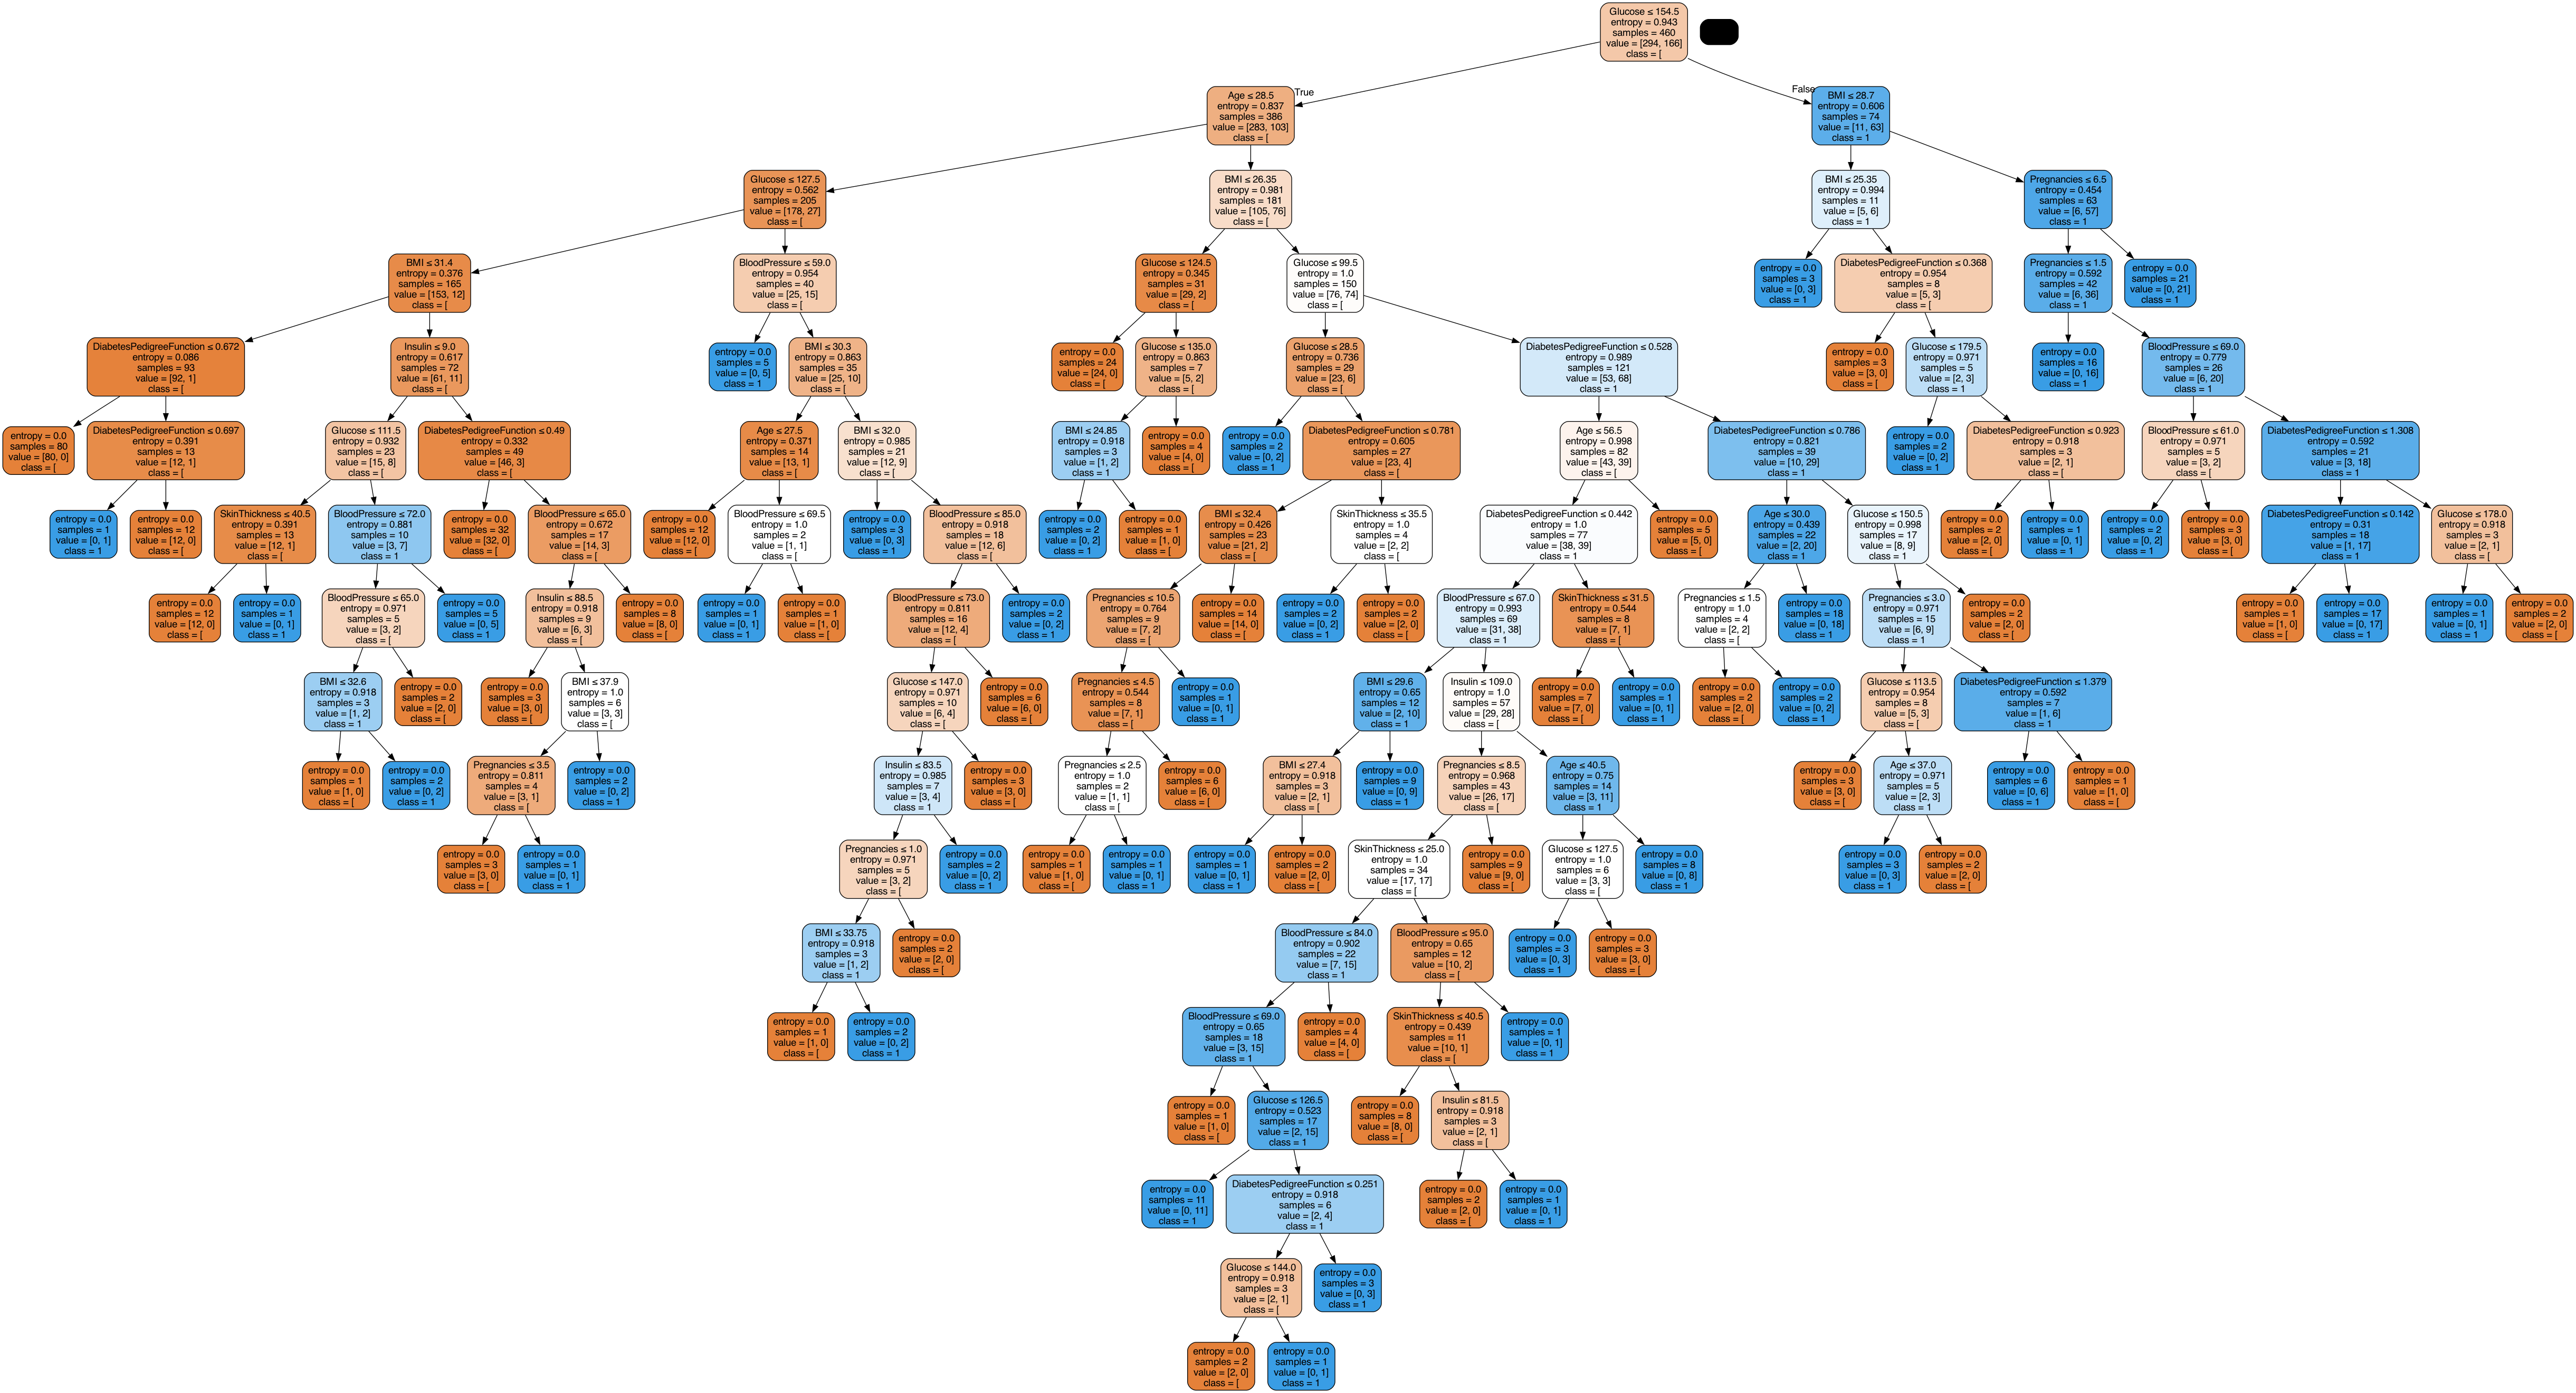

In [35]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import pydotplus
from IPython.display import Image

# Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion='entropy')  # You can use 'gini' / 'entropy' for criterion
classifier.fit(X_train, y_train)
y_pred_dtc = classifier.predict(X_test)

# Evaluate Decision Tree Classifier
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print("Decision Tree Classifier:")
print(f'Accuracy: {accuracy_dtc:.2f}')
print(classification_report(y_test, y_pred_dtc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtc))

dot_data = export_graphviz(classifier, out_file=None, feature_names=X.columns, class_names=str(y.unique()),
                           filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Save the decision tree image
decision_tree_image_path = "decision_tree.png"
graph.write_png(decision_tree_image_path)

# Display the decision tree image
Image(decision_tree_image_path)